DESCRIPTION

The Beer production dataset provides a time series data for monthly beer production in Australia, for the period Jan 1956 – Aug 1995.<br>
Objective:<br>
• Check for the stationarity of your data using Rolling Statistics and Dickey-Fuller test.<br>
• If stationarity is present, remove it using differencing in Python.<br>

In [44]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from statsmodels.tsa.stattools import acf,pacf,adfuller
from statsmodels.tsa.arima_model import ARIMA
import math
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/sathi/Downloads/1566814021_lesson8timeseriesmodeling/Lesson 8-Time Series Modeling/monthly-beer-production-in-austr.csv')

In [3]:
df.head()

,Month,Monthly beer production in Australia
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [4]:
df['Month'] = df['Month'].apply(lambda x : dt(int(x[:4]),int(x[5:]),15))

In [5]:
df.set_index('Month',inplace=True)

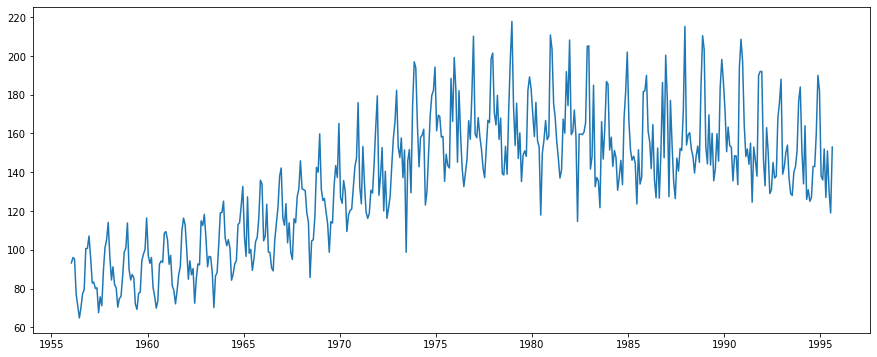

In [46]:
plt.figure(figsize=(15,6))
plt.plot(ts)

In [7]:
ts = df['Monthly beer production in Australia']

## Perform log decomposition on the Timeseries

In [27]:
ts_log = np.log(ts)

## Stationarity Check on the Timeseries

In [24]:
def test_stationarity(timeseries):
    ts_mean = timeseries.rolling(window=52,center=False).mean()
    ts_std = timeseries.rolling(window=52,center=False).std()
    
    original = plt.plot(timeseries,color='blue',label='Original')
    mean = plt.plot(ts_mean,color='red',label='Mean')
    std = plt.plot(ts_std,color='black',label='Standard Deviation')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    print('Results of Dickey-Fuller Test')
    dffuller = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(dffuller[0:4],index=['Test Statistic','p-value','Lags used','#Number of observations used'])
    
    for key,value in dffuller[4].items():
        dfoutput['Critical Value %s' %key] = value
        
    print(dfoutput)

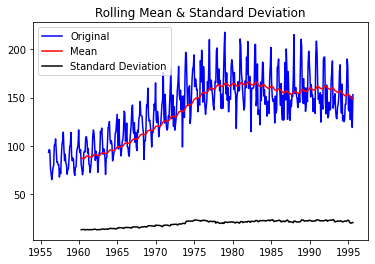

Results of Dickey-Fuller Test
Test Statistic                   -2.282661
p-value                           0.177621
Lags used                        17.000000
#Number of observations used    458.000000
Critical Value 1%                -3.444709
Critical Value 5%                -2.867871
Critical Value 10%               -2.570142
dtype: float64


In [47]:
test_stationarity(df['Monthly beer production in Australia'])

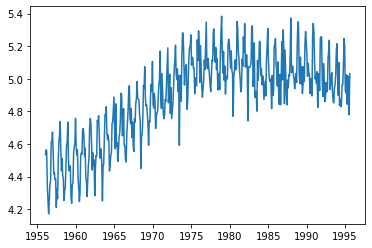

In [48]:
plt.plot(ts_log)

## Plotting the Moving Average and Standard Deviation

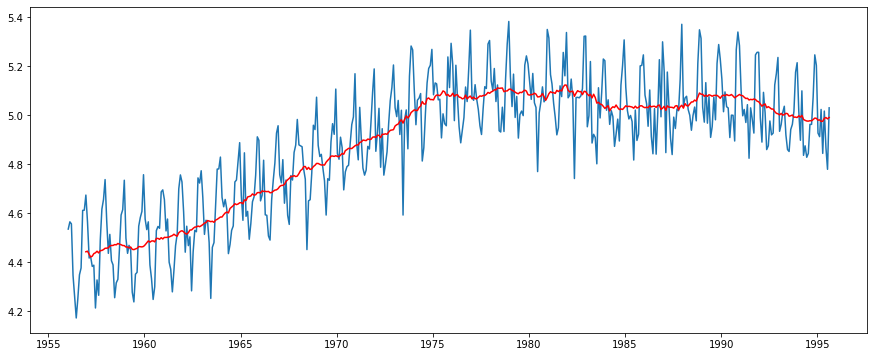

In [37]:
movingAverage = ts_log.rolling(window=12).mean()
movingStdDev = ts_log.rolling(window=12).std()
plt.figure(figsize=(15,6))
plt.plot(ts_log)
plt.plot(movingAverage,color = 'Red')
plt.show()

## Applying differencing to the timeseries with the log decomposed values

In [39]:
ts_log_movingAvg = ts_log - movingAverage

In [41]:
ts_log_movingAvg.dropna(inplace=True)

## Testing Stationarity after applying differencing

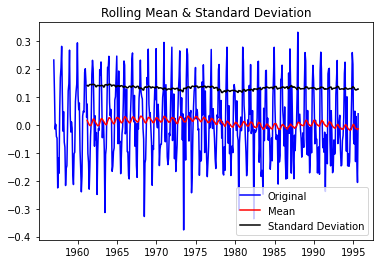

Results of Dickey-Fuller Test
Test Statistic                   -3.432559
p-value                           0.009898
Lags used                        13.000000
#Number of observations used    451.000000
Critical Value 1%                -3.444933
Critical Value 5%                -2.867970
Critical Value 10%               -2.570195
dtype: float64


In [43]:
test_stationarity(ts_log_movingAvg)

#### The timeseries is now stationary as the Test Statistic value is less than the Critical value 
#### and the moving average is more or less constant